# Esperanza

A continuación simularemos distintas distribuciones junto con su esperanza, para aprender más sobre su interpretación. Usaremos el código de cuadernos anteriores y agregaremos al histograma una línea vertical para representar la esperanza de la distribución.

### Intepretación de la esperanza
La esperanza es el centro de masa de una función de densidad de probabilidad.



In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

#### Distribución Bernoulli
Sabemos que si $X \sim Ber(p)$, entonces $\mathbb{E}(X) = p$.

In [28]:
class Bernoulli():

  def __init__(self, p):
    '''
    p: Parámetro de la distribución
    '''
    self.p = p

  def bernoulli(self):
    u = random.random()
    if u < self.p:
      x = 1
    else:
      x = 0
    return x

  def graficar(self, N = 1000, esperanza = False):
    plt.figure()
    muestra = [self.bernoulli() for _ in range(N)]
    plt.hist(muestra, bins = 6, edgecolor = 'darkblue', color = 'turquoise', align='mid', density = True)
    if esperanza:
      plt.axvline(self.p, color='green', linestyle='--', label=f'Esperanza') # Agregamos que grafique una línea vertical para la esperanza
    plt.title(f'Distribución Bernoulli con p = {self.p}')
    plt.legend()
    plt.show()

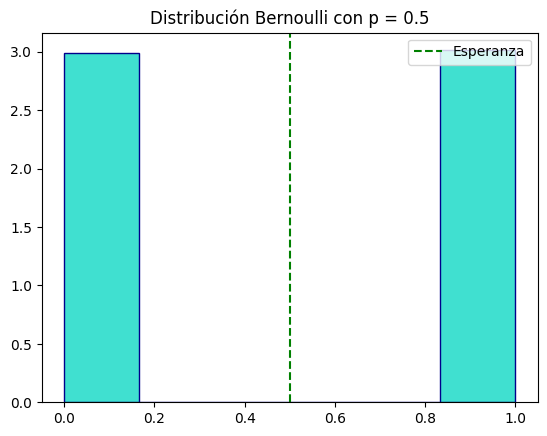

In [30]:
ber1 = Bernoulli(0.5)
ber1.graficar(esperanza = True)

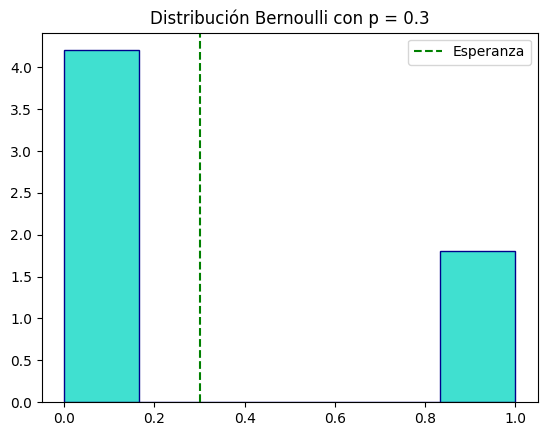

In [32]:
ber2 = Bernoulli(0.3)
ber2.graficar(esperanza = True)

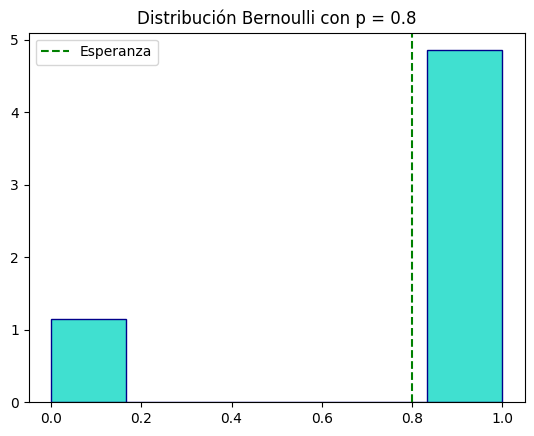

In [33]:
ber3 = Bernoulli(0.8)
ber3.graficar(esperanza = True)

Podemos ver que se va más cerca del lado que tiene más masa.

#### Distribución Binomial
Sabemos que si $X \sim Bin(n,p)$, entonces $\mathbb{E}(X) = np$.

In [42]:
def simular_discretas(x, p):
  # Guardamos en un df los datos
  df = pd.DataFrame({'x': x, 'p': p})
  # La suma acumulada y la uniforme
  df['p_acum'] = df['p'].cumsum()
  u = random.random()

  for i in range(len(df)):
      if u <= df['p_acum'][i]: # La condición
          return df['x'][i]
  return np.random.choice(x, p=p)

import math
def masa_binomial(n, p, j):
  # Devuelve P(Bin(n,p)=j)
  return (math.comb(n, j))*(p**j)*((1-p)**(n-j))

class Binomial:

  def __init__(self, n, p):
    self.n = n
    self.p = p
    # Calculamos la binomial como antes
    self.soporte_binomial = range(1, n+1)
    self.proba_binomial = [masa_binomial(n, p, j) for j in self.soporte_binomial]
    suma = sum(self.proba_binomial)
    self.proba_binomial = [q/suma for q in self.proba_binomial] # Normalizamos por errores numéricos

  def simular(self):
    return simular_discretas(self.soporte_binomial, self.proba_binomial)

  def graficar(self, N=100, esperanza = False):
    # Visualizamos el histograma
    Binom = [self.simular() for i in range(N)]
    plt.figure(figsize=(10,5))
    plt.hist(Binom, bins=range(N+2), align='left', rwidth=1, edgecolor='black', color = 'indigo')
    plt.title(f'Histograma de una muestra binomial de {N} elementos')
    if esperanza:
      plt.axvline(self.n*self.p, color='green', linestyle='--', label=f'Esperanza') # Agregamos que grafique una línea vertical para la esperanza
    plt.legend()
    plt.xlabel('Valores de X')
    plt.ylabel('Frecuencia')
    plt.xlim(0,self.n)
    plt.show

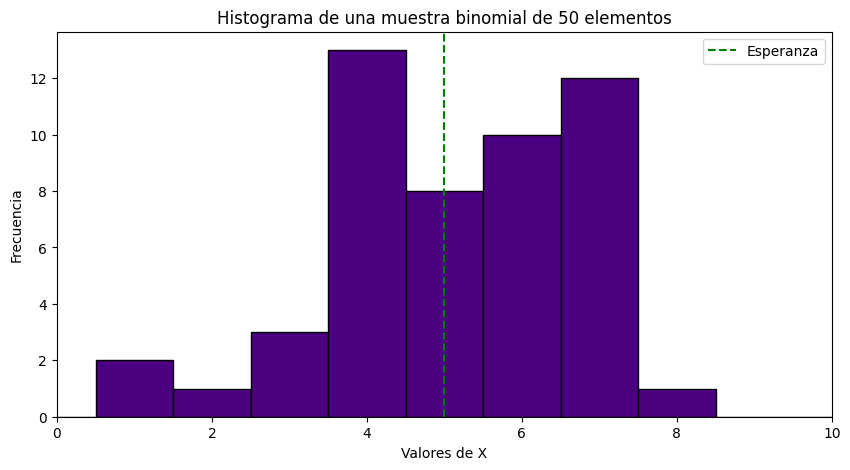

In [46]:
bin1 = Binomial(10, 0.5)
bin1.graficar(N = 50, esperanza = True)

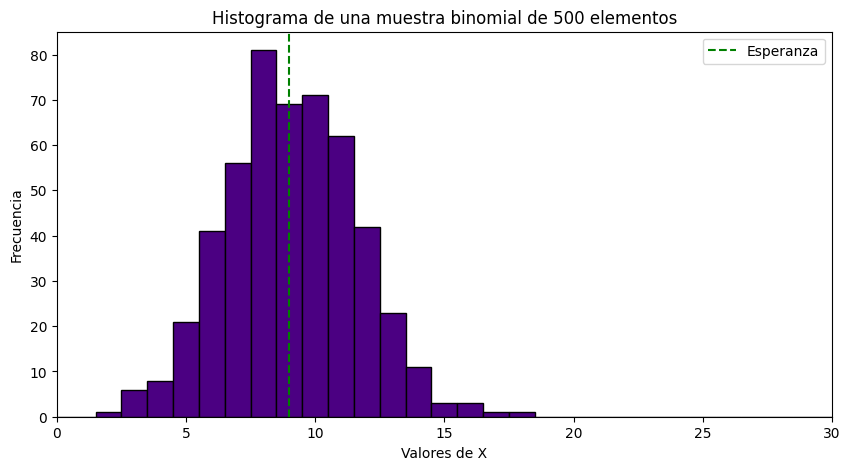

In [51]:
bin2 = Binomial(30, 0.3)
bin2.graficar(N = 500, esperanza = True)

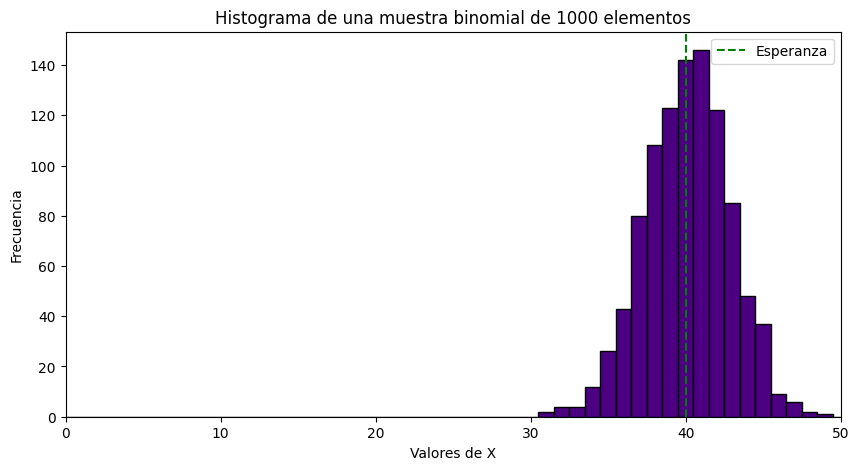

In [52]:
bin3 = Binomial(50, 0.8)
bin3.graficar(N = 1000, esperanza = True)

#### Distribución Poisson
Sabemos que si $X \sim Poi(\lambda)$ con $\lambda > 0$, entonces $\mathbb{E}(X) = \lambda$.

In [53]:
# Función de masa de una Poisson
def masa_poisson(lam, j):
  return (math.exp(-lam) * lam**j) / math.factorial(j)

def simular_poisson(lam):
  F = 0
  u = random.random()
  Z = []
  # Verificamos la condición con el bucle while
  while F < u:
    Z.append(len(Z))
    F += masa_poisson(lam,Z[-1])
  return Z[-1]

class Poisson:
  def __init__(self, lam):
    '''
    lam: parámetro de la distribución Poisson
    '''
    self.lam = lam
  def masa(self, j):
    return masa_poisson(self.lam, j) # Función de masa
  def graficar(self, N=1000, esperanza = False):
    xpoints = [simular_poisson(self.lam) for i in range(N)] # Lista de valores de X
    plt.figure()
    plt.hist(xpoints, bins = range(max(xpoints)+2), edgecolor = 'black', color = 'indigo', align='left') # Histograma
    if esperanza:
      plt.axvline(self.lam, color='green', linestyle='--', label=f'Esperanza') # Agregamos que grafique una línea vertical para la esperanza
    plt.title(f'Distribución Poisson de parámetro {self.lam}')
    plt.xlabel('X')

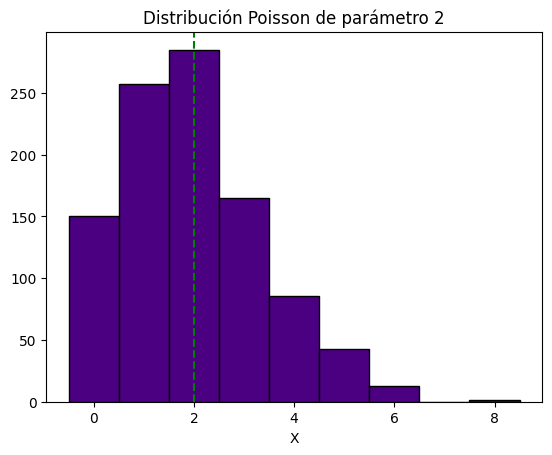

In [54]:
poi1 = Poisson(2)
poi1.graficar(esperanza = True)

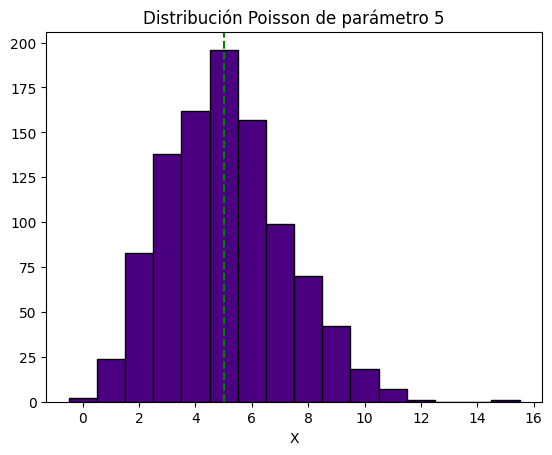

In [55]:
poi2 = Poisson(5)
poi2.graficar(esperanza = True)

#### Distribución exponencial
Sabemos que si $X \sim exp(\lambda)$, entonces $\mathbb{E}(X) = \frac{1}{\lambda}$

In [57]:
class Exponencial:
  def __init__(self, lam):
    '''
    lam: Parámetro de la distribución
    '''
    self.lam = lam

  def simular_exp(self):
    # Simulamos la exponencial con el método de la función inversa
    u = random.random()
    x = -math.log(1 - u) / self.lam
    return x

  def graficar(self, N = 1000, dens = True, esperanza = False):
    plt.figure()
    xpoints = [self.simular_exp() for _ in range(N)]
    plt.hist(xpoints, bins = 50, edgecolor = 'darkblue', color = 'turquoise', align='mid', density = True)
    if dens:
      x = np.linspace(0, 10, 200)
      y = self.lam * np.exp(-self.lam * x)
      plt.plot(x, y, color='red', label=f'Densidad exp({self.lam})')
    esp = 1/self.lam
    if esperanza:
      plt.axvline(esp, color='green', linestyle='--', label=f'Esperanza') # Agregamos que grafique una línea vertical para la esperanza
    plt.title(f'Distribución exponencial {self.lam}')
    plt.legend()
    plt.show()

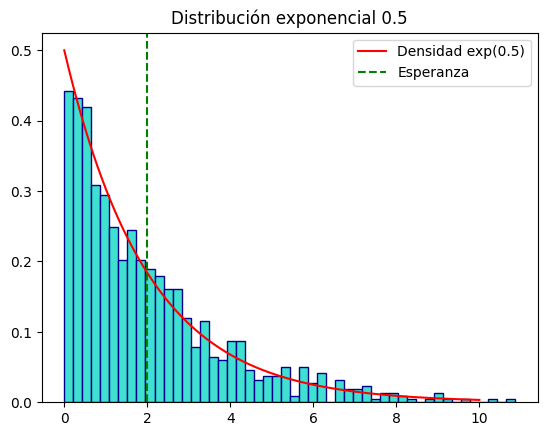

In [58]:
exp1 = Exponencial(0.5)
exp1.graficar(esperanza = True)

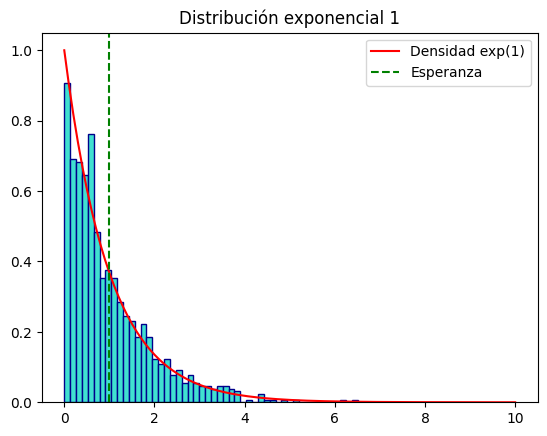

In [59]:
exp2 = Exponencial(1)
exp2.graficar(esperanza = True)

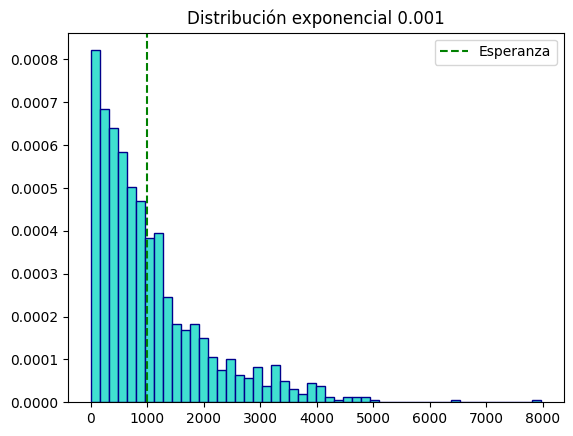

In [61]:
exp3 = Exponencial(0.001)
exp3.graficar(dens = False, esperanza = True)

#### Distribución Normal
Sabemos que si $X \sim \mathcal{N}(\mu, \sigma^2)$, entonces $\mathbb{E}(X) = \mu$.

In [80]:
def ar_normal():
  # Parámetros del método
  u = random.random()
  Y = np.random.exponential(1)
  c = math.sqrt(2*math.e/math.pi)
  # Método de aceptación rechazo
  while u > c*math.exp(-(Y-1)**2/2):
    u = random.random()
    Y = np.random.exponential(1)
  # Elección del signo
  ber = np.random.binomial(1, 0.5)
  if ber == 0:
    X = Y
  else:
    X = -Y
  return X

class Normal():

  def __init__(self, mu, sigma):
    '''
    mu: media de la normal
    sigma: desviación estándar de la normal
    '''
    self.mu = mu
    self.sigma = sigma

  def simular(self, N = 10000):
    estandar = np.array([ar_normal() for _ in range(N)])
    normal = self.sigma*estandar + self.mu
    return normal

  def graficar(self, N = 10000, dens = True, esperanza = False):
    normal = self.simular(N)
    plt.figure()
    plt.hist(normal, density= True, bins = 50, edgecolor = 'darkblue', color = 'turquoise', align='mid')
    if dens:
      xn = np.linspace(self.mu-3*self.sigma, self.mu+3*self.sigma, 200)
      yn = 1/math.sqrt(2*math.pi*self.sigma**2)*np.exp(-(xn-self.mu)**2/(2*self.sigma**2))
      plt.plot(xn, yn, color='red', label=f'Densidad normal({self.mu}, {self.sigma})')
    if esperanza:
      plt.axvline(self.mu, color='green', linestyle='--', label=f'Esperanza') # Agregamos que grafique una línea vertical para la esperanza
    plt.title(f'Distribución normal({self.mu}, {self.sigma})')
    plt.show()

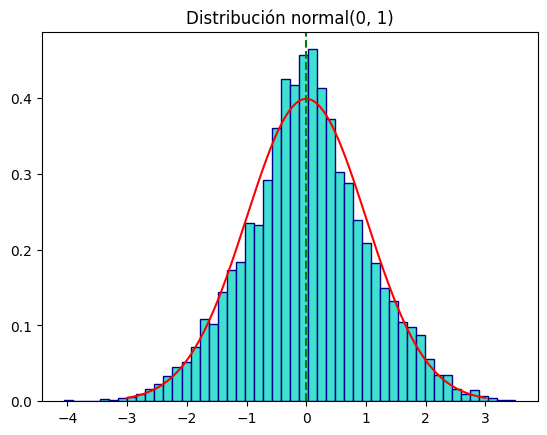

In [81]:
n1 = Normal(0, 1)
n1.graficar(esperanza = True)

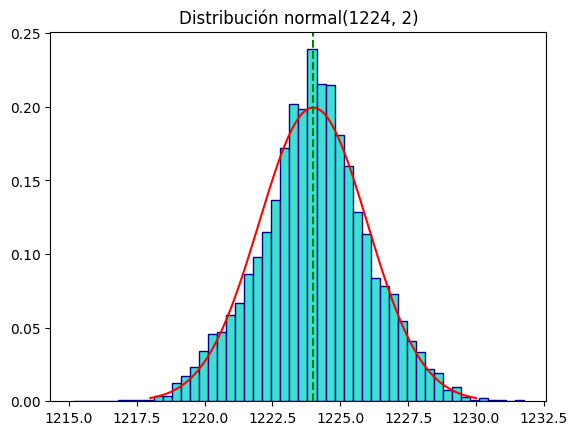

In [82]:
n2 = Normal(1224, 2)
n2.graficar(esperanza = True)

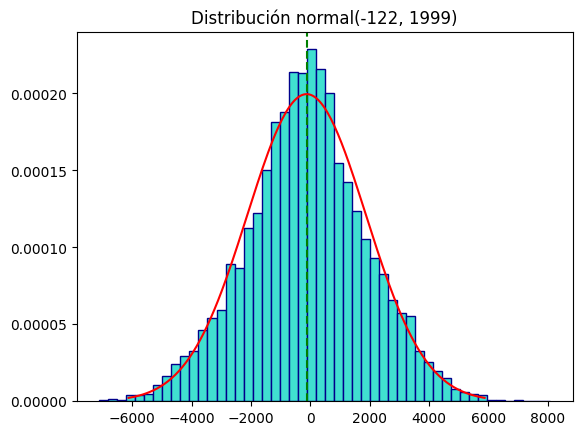

In [83]:
n3 = Normal(-122, 1999)
n3.graficar(esperanza = True)

#### Cauchy
Sabemos que la variable aleatoria Cauchy no tiene esperanza, por lo que veremos qué pasa si generamos muestras de esta distribución junto con su media (que es un buen estimador de la esperanza).

In [65]:
# Función para simular Cauchy
def simular_cauchy(x0=0, gamma=1):
    u = random.random()
    return x0 + gamma * math.tan(math.pi * (u - 0.5))

class Cauchy:
    def __init__(self, x0=0, gamma=1):
        '''
        x0: parámetro de localización
        gamma: parámetro de escala (>0)
        '''
        self.x0 = x0
        self.gamma = gamma

    def graficar(self, N=1000, dens=True, rango=(-10,10), esperanza = False):
        plt.figure()
        xpoints = [simular_cauchy(self.x0, self.gamma) for _ in range(N)] # simulamos valores de Cauchy
        plt.hist(xpoints, bins=100, density=True, edgecolor='darkblue',
                 color='turquoise', align='mid', alpha=0.7, range=rango) # graficamos el histograma

        if dens: # si esto es verdadero grafica la densidad también
            x = np.linspace(rango[0], rango[1], 500)
            y = 1/(math.pi * self.gamma * (1 + ((x - self.x0)/self.gamma)**2))
            plt.plot(x, y, color='red', label=f'Cauchy(x0={self.x0}, γ={self.gamma})')
        if esperanza:
          plt.axvline(np.mean(np.array(xpoints)), color='green', linestyle='--', label=f'Esperanza') # Agregamos que grafique una línea vertical para la esperanza

        plt.title(f'Distribución Cauchy (x0={self.x0}, γ={self.gamma})')
        plt.legend()
        plt.show()


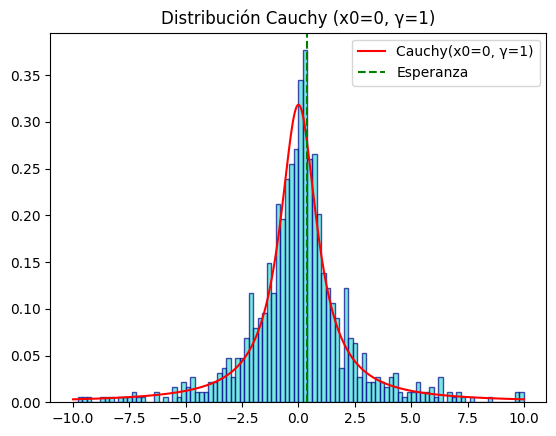

In [71]:
cauchy1 = Cauchy(0, 1)
cauchy1.graficar(esperanza = True)

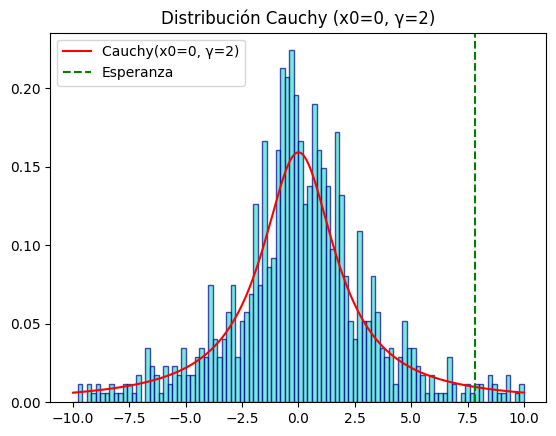

In [76]:
cauchy2 = Cauchy(0, 2)
cauchy2.graficar(esperanza = True)